In [47]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
N = 1000
np.random.seed(42)

x = np.sort(5 * np.random.rand(N, 1), axis=0)
T = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Add noise to targets.
y += 0.1*np.random.randn(N)

In [49]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [50]:
# Set parameters for grid-search
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]

# Instantiate k-NN Regressor.
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=3, n_jobs=-1)

# Train model for grid_search
grid_search.fit(x_train, y_train)

print('Optimal Hyperparameters:\n', grid_search.best_params_)
print('\nBest Score:\n', grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Optimal Hyperparameters:
 {'n_neighbors': 20, 'weights': 'uniform'}

Best Score:
 0.9796209553627315


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.0s finished


In [51]:
# Create an instance of Neighbours Classifier and fit the data with best k.
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform') # Definir com GridSearchCV qual o melhor k = n_neighbors

# Train model for knn Regressor and predict
y_predict = knn.fit(x_train, y_train).predict(T)

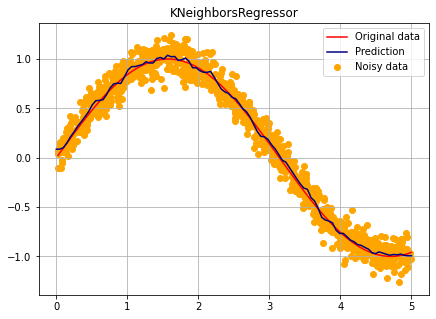

In [53]:
# Ploting great parameters of k-NN regressor
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='orange', label='Noisy data')
plt.plot(x, y_orig, color='red', label='Original data')
plt.plot(T, y_predict, color='navy', label='Prediction')
plt.legend()
plt.grid()
plt.title("KNeighborsRegressor")
plt.show()

## MSE Testing and Validation Sets

In [55]:
# Defining with GridSearchCV which is the best k = n_neighbors
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform') 

# Train model for knn Regressor and predict
knn.fit(x_train, y_train)

# Predict train set
y_train_predict = knn.predict(x_train)

# Predict test set
y_test_predict = knn.predict(x_test)

# MSE Training error
MSE_teste = mean_squared_error(y_train, y_train_predict)
print(' MSE Training Set:\n', MSE_teste*100, '%')

# MSE validation error
MSE_validacao = mean_squared_error(y_test, y_test_predict)
print('\n MSE Validation Set:\n', MSE_validacao*100, '%')

 MSE Training Set:
 0.9212575673653748 %

 MSE Validation Set:
 1.0674967098626782 %
